#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# !pip install light-the-torch >> /.tmp
# !ltt install torch torchvision >> /.tmp
# !pip install fastai --upgrade >> /.tmp

# Loading model

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/vegetable dataset/tuner/trained_model.h5')

# Loading train history

In [ ]:
training_history = open('/content/drive/MyDrive/vegetable dataset/tuner/training_hist.json', 'r')
training_history = json.loads(training_history.read())
# print(training_history.read())

#Data Preprocessing

##Training Image preprocessing

In [ ]:
training_set, validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/train data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=60,
    validation_split=0.1,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6651 files belonging to 8 classes.
Using 5986 files for training.
Using 665 files for validation.


#Building Model

In [ ]:
# Intializing a sequential model
cnn = tf.keras.models.Sequential()

# Convolution block 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

# convolution block 2
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Dense layers
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

# Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))

NameError: name 'tf' is not defined

# Callbacks

In [ ]:
# dynamic learning rate reduction
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

# tensorboard logs
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir="/content/train_logs",
    histogram_freq=0,  # How often to log histogram visualizations
    embeddings_freq=0,  # How often to log embedding visualizations
    update_freq="epoch",
)  # How often to write logs (default: once per epoch)

#Compiling and Model Summary

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                      

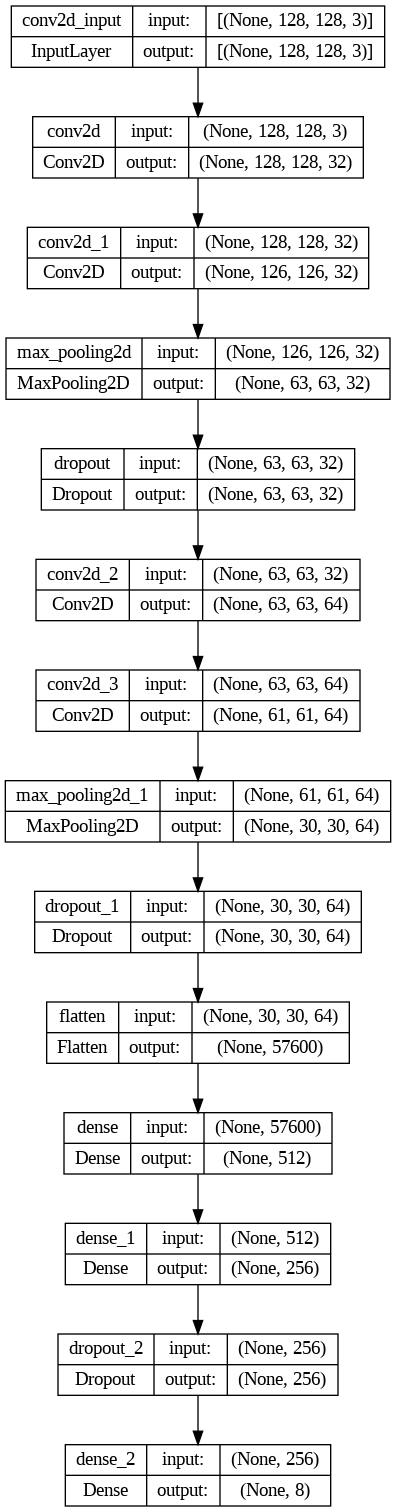

In [ ]:
tf.keras.utils.plot_model(cnn, "multi_input_and_output_model.png", show_shapes=True)

# Training phase

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32, callbacks=[reduce_lr, tensorboard])

Epoch 1/32
188/188 [==============================] - 38s 144ms/step - loss: 15.3508 - accuracy: 0.1420 - val_loss: 2.0250 - val_accuracy: 0.1910 - lr: 0.0010
Epoch 2/32
188/188 [==============================] - 24s 122ms/step - loss: 2.0090 - accuracy: 0.2031 - val_loss: 1.9112 - val_accuracy: 0.2752 - lr: 0.0010
Epoch 3/32
188/188 [==============================] - 22s 113ms/step - loss: 1.8617 - accuracy: 0.2746 - val_loss: 1.5825 - val_accuracy: 0.3744 - lr: 0.0010
Epoch 4/32
188/188 [==============================] - 22s 111ms/step - loss: 1.5312 - accuracy: 0.3956 - val_loss: 1.3342 - val_accuracy: 0.4647 - lr: 0.0010
Epoch 5/32
188/188 [==============================] - 22s 114ms/step - loss: 1.3156 - accuracy: 0.4957 - val_loss: 1.2866 - val_accuracy: 0.4677 - lr: 0.0010
Epoch 6/32
188/188 [==============================] - 23s 116ms/step - loss: 1.1360 - accuracy: 0.5787 - val_loss: 1.0928 - val_accuracy: 0.5835 - lr: 0.0010
Epoch 7/32
139/188 [=====================>........]

# Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

188/188 [==============================] - 17s 85ms/step - loss: 0.0075 - accuracy: 0.9978
Training accuracy: 0.9978282451629639


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

21/21 [==============================] - 2s 84ms/step - loss: 0.4411 - accuracy: 0.9338
Validation accuracy: 0.9338346123695374


# Saving Model

In [ ]:
cnn.save('/content/drive/MyDrive/vegetable dataset/tuner/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #Return Dictionary of history

{'loss': [1.676928997039795,
  1.1793019771575928,
  0.957673192024231,
  0.8711544275283813,
  0.5953857898712158,
  0.4760811924934387,
  0.40941542387008667,
  0.3342859447002411,
  0.31503593921661377,
  0.23701106011867523,
  0.27353188395500183,
  0.21856644749641418,
  0.15903517603874207,
  0.16287243366241455,
  0.16453635692596436,
  0.10226044803857803,
  0.10736456513404846,
  0.13763955235481262,
  0.26800939440727234,
  0.0870903804898262,
  0.05248720571398735,
  0.11527656018733978,
  0.03812965005636215,
  0.043407656252384186,
  0.07328693568706512,
  0.044176135212183,
  0.16168808937072754,
  0.07424271106719971,
  0.15814664959907532,
  0.06576181948184967,
  0.08088633418083191,
  0.05099506303668022],
 'accuracy': [0.3396258056163788,
  0.5223855376243591,
  0.6294687390327454,
  0.6734046339988708,
  0.7811560034751892,
  0.8187437057495117,
  0.84964919090271,
  0.8802205324172974,
  0.8947544097900391,
  0.9206481575965881,
  0.9111259579658508,
  0.9313398003

In [ ]:
#Recording History in json
import json
with open('/content/drive/MyDrive/vegetable dataset/tuner/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.38346123695374 %


#Accuracy Visualization

## Model Accuracy

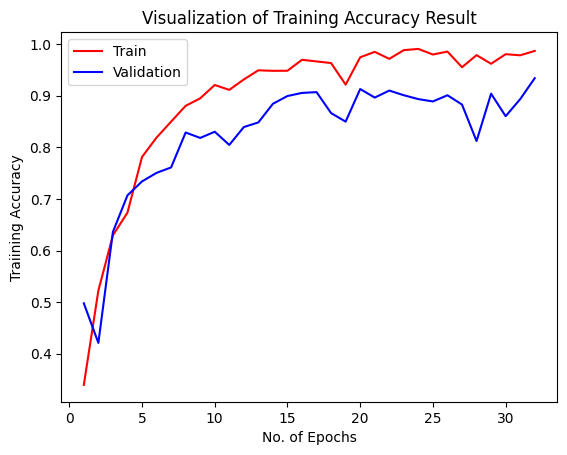

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history['accuracy'],color='red')
plt.plot(epochs,training_history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Loss plot

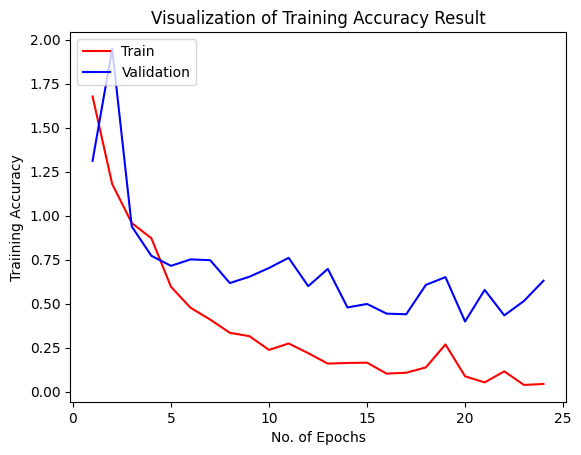

In [ ]:
epochs = [i for i in range(1,25)]
plt.plot(epochs,training_history['loss'][:24],color='red')
plt.plot(epochs,training_history['val_loss'][:24],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Training Visualization

In [ ]:
#training_history.history['accuracy']

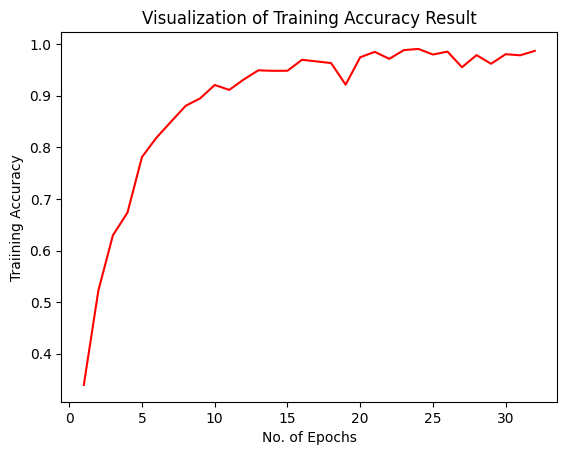

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

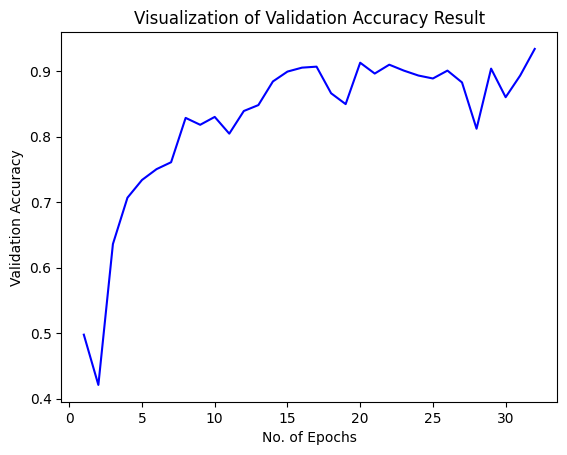

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Load Test set

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/test data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1659 files belonging to 8 classes.


## extracting test labels

In [ ]:
y = np.concatenate([y for x, y in test_set], axis=0)
x = np.concatenate([x for x, y in test_set], axis=0)
test_labels = np.argmax(y,axis=1)

print(f'test_vector = {y[0]}')
print(f'test_label = {test_labels[0]}')



test_vector = [0. 0. 0. 0. 1. 0. 0. 0.]
test_label = 4


## evaluating test accuracy

In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

52/52 [==============================] - 158s 3s/step - loss: 0.4998 - accuracy: 0.9186
Test accuracy: 0.9186256527900696


## test predictions

In [ ]:
test_history = cnn.predict(test_set)
print(test_history)

52/52 [==============================] - 43s 818ms/step
<_io.TextIOWrapper name='/content/drive/MyDrive/vegetable dataset/tuner/training_hist.json' mode='r' encoding='UTF-8'>


In [ ]:
y_predicted = []
for idx, i in enumerate(test_history):
  y_predicted.append(np.argmax(i))
  print(f'index = {idx}, True class => {test_labels[idx]}, {np.argmax(i)} <= Predicted class')

index = 0, True class => 1, 4 <= Predicted class
index = 1, True class => 2, 5 <= Predicted class
index = 2, True class => 5, 5 <= Predicted class
index = 3, True class => 0, 6 <= Predicted class
index = 4, True class => 6, 1 <= Predicted class
index = 5, True class => 2, 4 <= Predicted class
index = 6, True class => 2, 3 <= Predicted class
index = 7, True class => 2, 5 <= Predicted class
index = 8, True class => 0, 4 <= Predicted class
index = 9, True class => 0, 3 <= Predicted class
index = 10, True class => 3, 2 <= Predicted class
index = 11, True class => 6, 6 <= Predicted class
index = 12, True class => 0, 4 <= Predicted class
index = 13, True class => 1, 3 <= Predicted class
index = 14, True class => 5, 0 <= Predicted class
index = 15, True class => 6, 0 <= Predicted class
index = 16, True class => 5, 0 <= Predicted class
index = 17, True class => 6, 6 <= Predicted class
index = 18, True class => 3, 1 <= Predicted class
index = 19, True class => 6, 7 <= Predicted class
index = 20

## test prediction graph

In [ ]:
#Recording test results in json
import json
with open('/content/drive/MyDrive/vegetable dataset/tuner/test_loss.json','w') as f:
  json.dump(test_loss,f)

with open('/content/drive/MyDrive/vegetable dataset/tuner/test_acc.json','w') as f:
  json.dump(test_acc,f)

0.49984246492385864


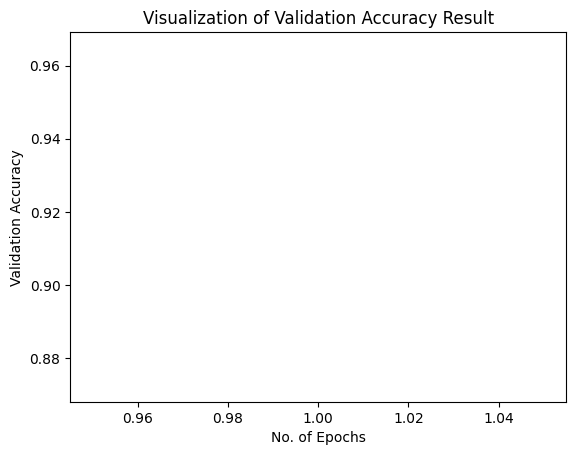

In [ ]:
# print(test_loss)
# plt.plot(1,test_acc,color='blue')
# plt.xlabel('No. of Epochs')
# plt.ylabel('Validation Accuracy')
# plt.title('Visualization of Validation Accuracy Result')
# plt.show()

## test set confusion matrix

In [ ]:
c_m = confusion_matrix(test_labels, y_predicted)
print(c_m)

[[21 21 22 27 23 31 28 30]
 [24 23 23 34 32 23 19 25]
 [32 23 21 26 19 25 31 27]
 [30 38 30 44 23 22 29 18]
 [27 27 21 29 35 29 20 18]
 [22 28 29 23 31 23 27 23]
 [26 23 19 25 21 22 34 30]
 [22 19 26 25 30 30 23 28]]


### colorful confusion matrix

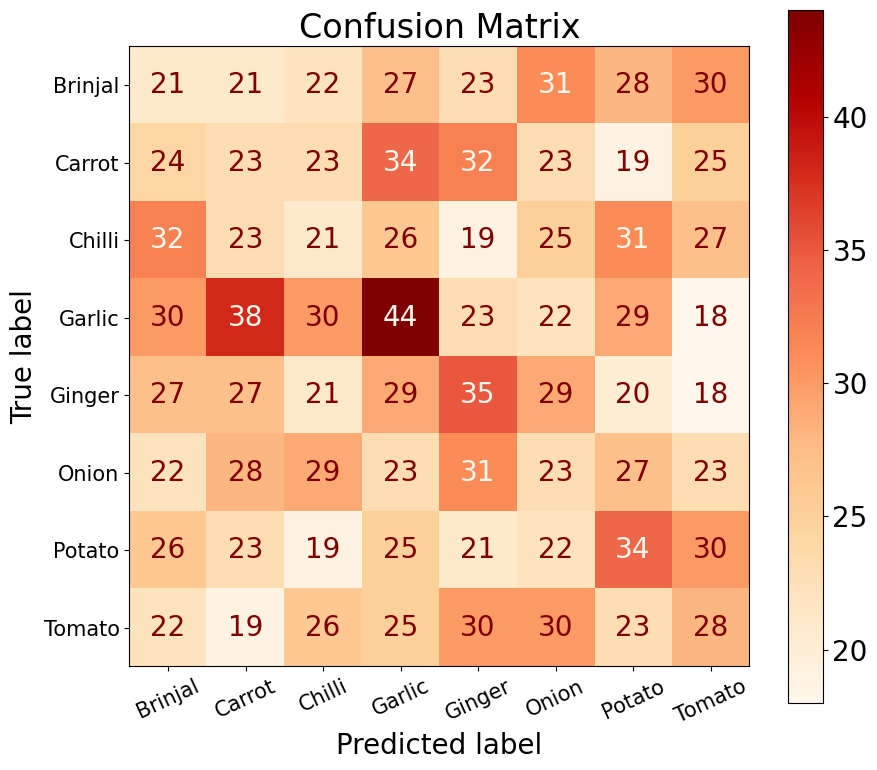

In [ ]:
labels = [
  "Brinjal",
  "Carrot",
  "Chilli",
  "Garlic",
  "Ginger",
  "Onion",
  "Potato",
  "Tomato",
];

# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()